# Data Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing

In [2]:
df = pd.read_csv(r'D:\python\pga29\bankk.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [3]:
records = df.shape[0]
print(records ,'records')
features = df.shape[1]
print(features,'features')

11162 records
17 features


# EDA - Exploratory Data Analysis

In [4]:
df_nullvalues = df.isnull().sum()

if df_nullvalues.sum() > 0:
    print(df_nullvalues)
else:
    print('No missing values')

No missing values


In [5]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [7]:
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

job
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital
['married' 'single' 'divorced']
education
['secondary' 'tertiary' 'primary' 'unknown']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'other' 'failure' 'success']
deposit
['yes' 'no']


In [8]:
df.nunique()

age            76
job            12
marital         3
education       4
default         2
balance      3805
housing         2
loan            2
contact         3
day            31
month          12
duration     1428
campaign       36
pdays         472
previous       34
poutcome        4
deposit         2
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
pd.DataFrame(df['deposit'].value_counts()) #balanced

,count
deposit,
no,5873
yes,5289


In [11]:
pd.DataFrame(df['job'].value_counts())

,count
job,
management,2566
blue-collar,1944
technician,1823
admin.,1334
services,923
retired,778
self-employed,405
student,360
unemployed,357


In [12]:
pd.DataFrame(df['marital'].value_counts())

,count
marital,
married,6351
single,3518
divorced,1293


In [13]:
pd.DataFrame(df['contact'].value_counts())

,count
contact,
cellular,8042
unknown,2346
telephone,774


In [14]:
pd.DataFrame(df['poutcome'].value_counts())

,count
poutcome,
unknown,8326
failure,1228
success,1071
other,537


In [15]:
df1 = df.copy()
df1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [16]:
df1.groupby(['deposit','default']).size()

deposit  default
no       no         5757
         yes         116
yes      no         5237
         yes          52
dtype: int64

In [17]:
df1.drop(['default'],axis=1,inplace=True)

In [18]:
df1.groupby(['deposit','pdays']).size()

deposit  pdays
no       -1       4940
          1          2
          2          6
          5          2
          6          2
                  ... 
yes       804        1
          805        1
          828        1
          842        1
          854        1
Length: 732, dtype: int64

In [19]:
df1.drop(['pdays'],axis=1, inplace=True)

# Outilers

In [20]:
df1.groupby('age',sort=True)['age'].count()

age
18     8
19    13
20    20
21    30
22    48
      ..
89     1
90     2
92     2
93     2
95     1
Name: age, Length: 76, dtype: int64

In [21]:
df1.groupby(['deposit','balance'],sort=True)['balance'].count()

deposit  balance
no       -6847      1
         -2712      1
         -2282      1
         -2049      1
         -1965      1
                   ..
yes       34646     1
          36252     1
          45248     1
          52587     2
          81204     2
Name: balance, Length: 5082, dtype: int64

In [22]:
df1.groupby(['deposit','campaign'],sort=True)['campaign'].count()

deposit  campaign
no       1           2237
         2           1627
         3            703
         4            454
         5            239
         6            173
         7             92
         8             96
         9             51
         10            38
         11            24
         12            25
         13            24
         14            11
         15             9
         16             7
         17             8
         18             8
         19             5
         20             4
         21             7
         22             4
         23             3
         24             4
         25             3
         26             3
         27             1
         28             1
         29             1
         30             4
         31             1
         32             1
         33             1
         41             1
         43             2
         63             1
yes      1           2561
         2          

In [23]:
df2 = df1[df1['campaign']<33]

In [24]:
df2.groupby(['deposit','campaign'],sort=True)['campaign'].count()

deposit  campaign
no       1           2237
         2           1627
         3            703
         4            454
         5            239
         6            173
         7             92
         8             96
         9             51
         10            38
         11            24
         12            25
         13            24
         14            11
         15             9
         16             7
         17             8
         18             8
         19             5
         20             4
         21             7
         22             4
         23             3
         24             4
         25             3
         26             3
         27             1
         28             1
         29             1
         30             4
         31             1
         32             1
yes      1           2561
         2           1401
         3            618
         4            317
         5            139
         6          

In [25]:
df1.groupby(['deposit','previous'],sort=True)['previous'].count()

deposit  previous
no       0           4940
         1            304
         2            237
         3            141
         4             73
         5             44
         6             34
         7             23
         8             21
         9             10
         10             4
         11             8
         12             6
         13             2
         14             1
         15             4
         16             2
         17             8
         18             1
         19             2
         20             1
         23             1
         27             2
         28             1
         37             1
         40             1
         41             1
yes      0           3384
         1            583
         2            456
         3            294
         4            171
         5            121
         6             83
         7             54
         8             39
         9             24
         10         

In [26]:
df3 = df1[df1['previous']<31]

In [27]:
df3.groupby(['deposit','previous'],sort=True)['previous'].count()

deposit  previous
no       0           4940
         1            304
         2            237
         3            141
         4             73
         5             44
         6             34
         7             23
         8             21
         9             10
         10             4
         11             8
         12             6
         13             2
         14             1
         15             4
         16             2
         17             8
         18             1
         19             2
         20             1
         23             1
         27             2
         28             1
yes      0           3384
         1            583
         2            456
         3            294
         4            171
         5            121
         6             83
         7             54
         8             39
         9             24
         10            26
         11            15
         12            10
         13         

# Data Visualization

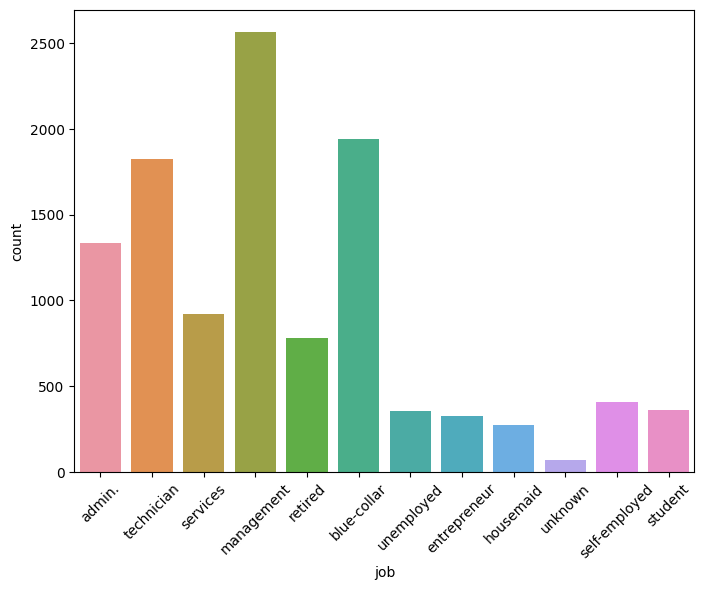

In [28]:
plt.figure(figsize=(8,6))
sns.countplot(x='job', data=df)
plt.xticks(rotation=45)
plt.show()

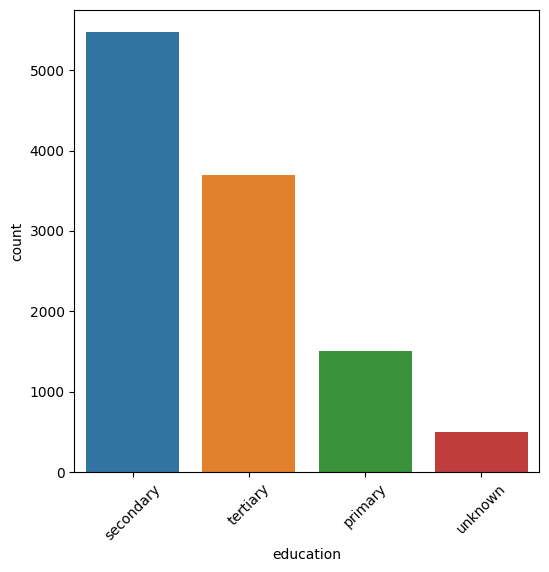

In [29]:
plt.figure(figsize=(6,6))
sns.countplot(x='education', data=df)
plt.xticks(rotation=45)
plt.show()

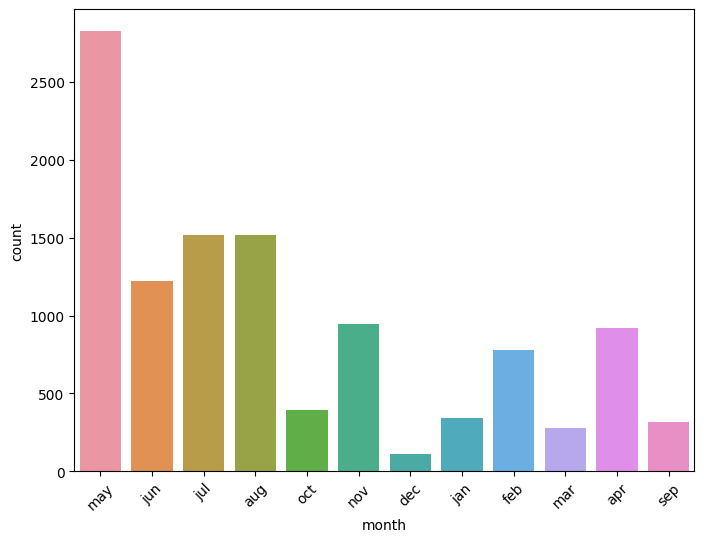

In [30]:
plt.figure(figsize=(8,6))
sns.countplot(x='month', data=df)
plt.xticks(rotation=45)
plt.show()

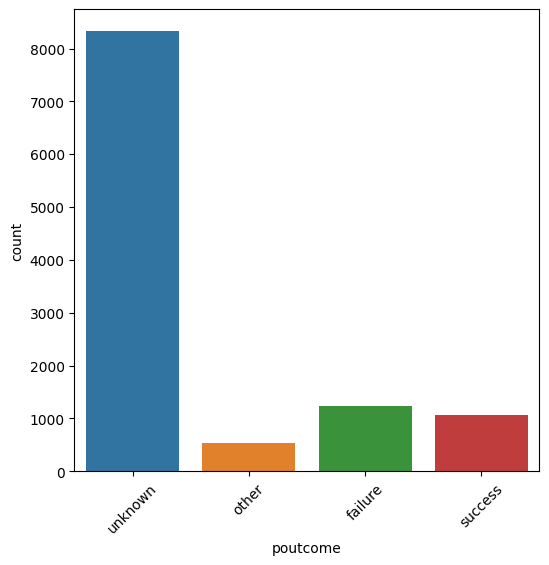

In [31]:
plt.figure(figsize=(6,6))
sns.countplot(x='poutcome', data=df)
plt.xticks(rotation=45)
plt.show()

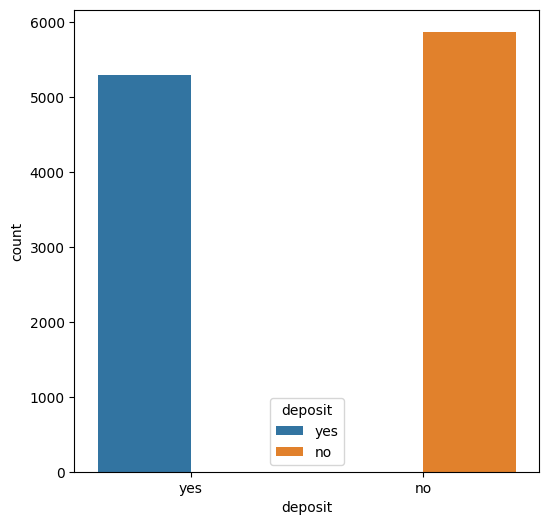

In [32]:
plt.figure(figsize=(6, 6))
sns.countplot(x='deposit', hue='deposit', data=df)
plt.show()

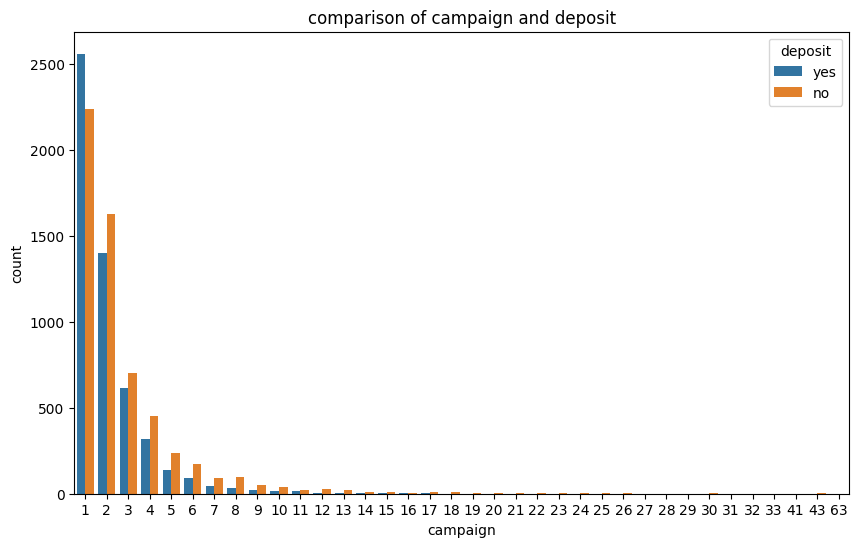

In [33]:
plt.figure(figsize=(10, 6))
sns.countplot(x='campaign', hue='deposit', data=df)
plt.title('comparison of campaign and deposit')
plt.show()

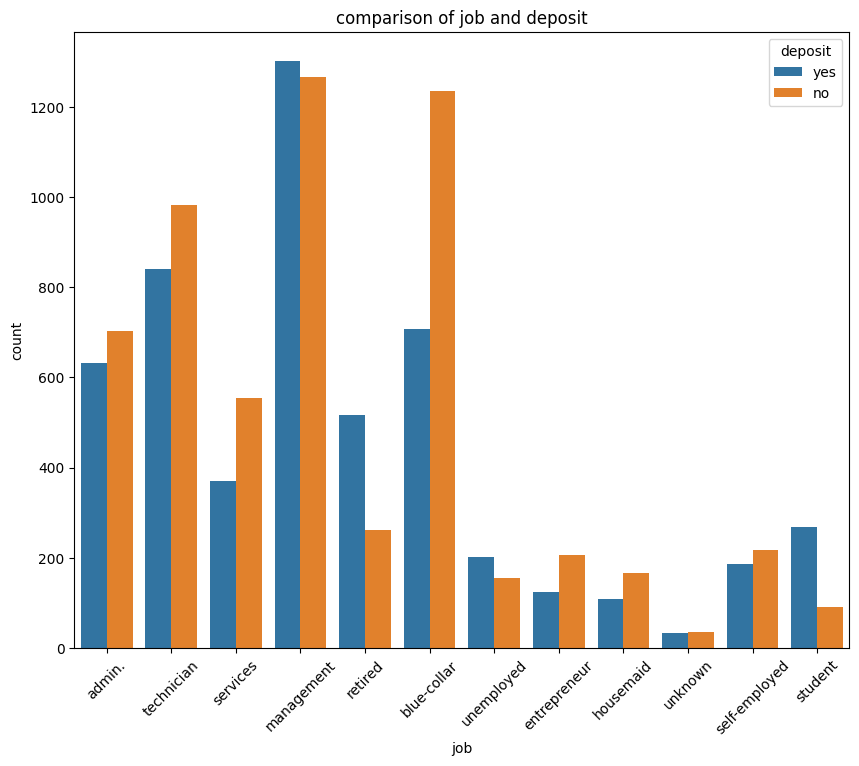

In [34]:
plt.figure(figsize=(10, 8))
sns.countplot(x='job', hue='deposit', data=df)
plt.xticks(rotation=45)
plt.title('comparison of job and deposit')
plt.show()

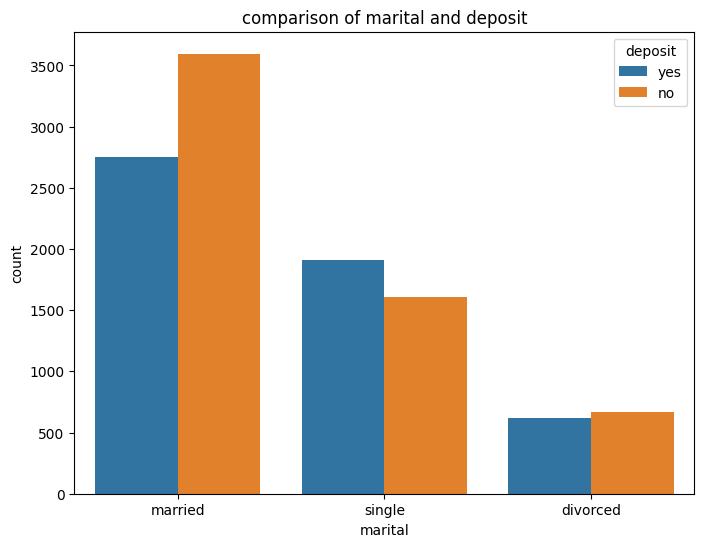

In [35]:
plt.figure(figsize=(8, 6))
sns.countplot(x='marital', hue='deposit', data=df)
plt.xticks(rotation=360)
plt.title('comparison of marital and deposit')
plt.show()

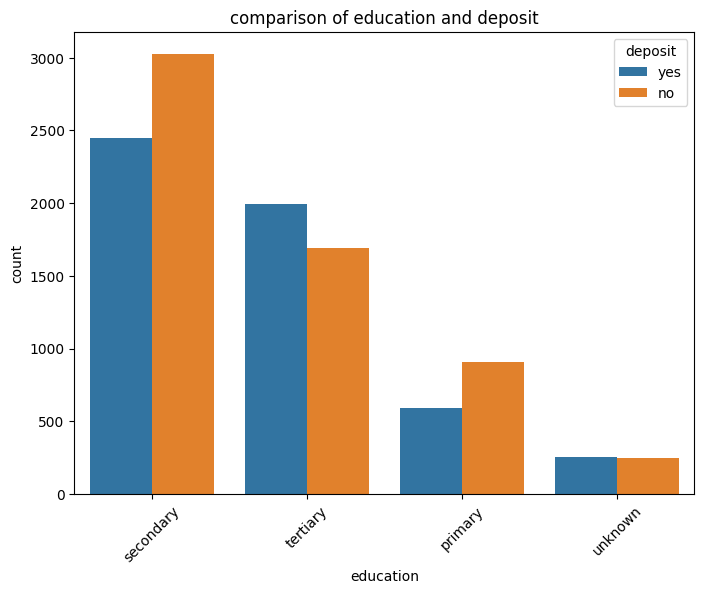

In [36]:
plt.figure(figsize=(8, 6))
sns.countplot(x='education', hue='deposit', data=df)
plt.xticks(rotation=45)
plt.title('comparison of education and deposit')
plt.show()

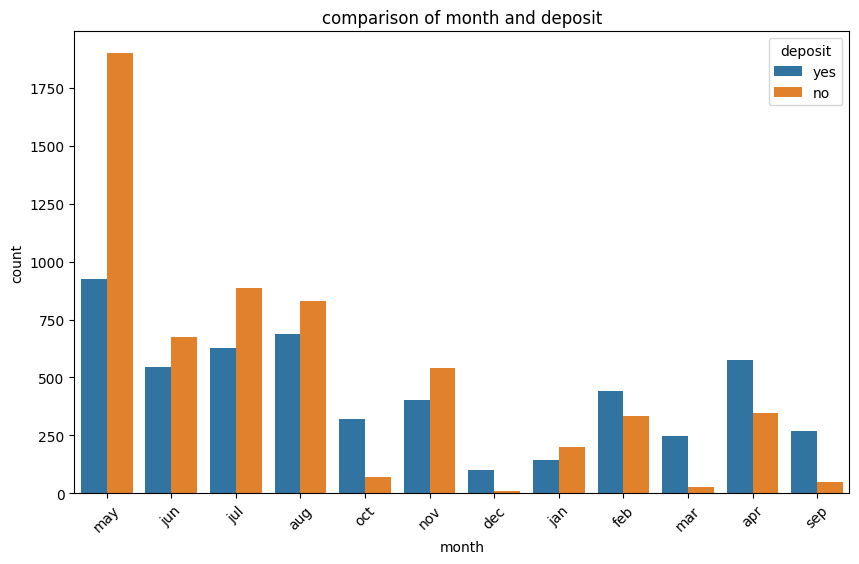

In [37]:
plt.figure(figsize=(10, 6))
sns.countplot(x='month', hue='deposit', data=df)
plt.xticks(rotation=45)
plt.title('comparison of month and deposit')
plt.show()

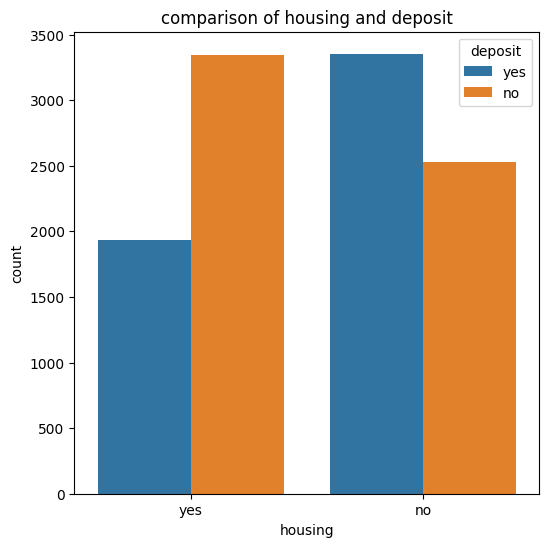

In [38]:
plt.figure(figsize=(6, 6))
sns.countplot(x='housing', hue='deposit', data=df)
plt.xticks(rotation=360)
plt.title('comparison of housing and deposit')
plt.show()

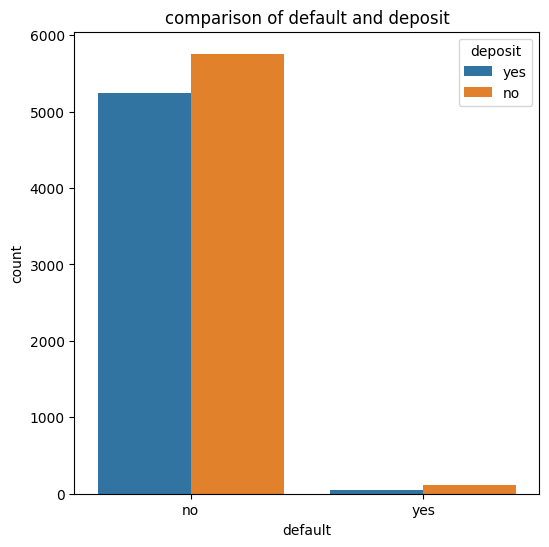

In [39]:
plt.figure(figsize=(6, 6))
sns.countplot(x='default', hue='deposit', data=df)
plt.xticks(rotation=360)
plt.title('comparison of default and deposit')
plt.show()

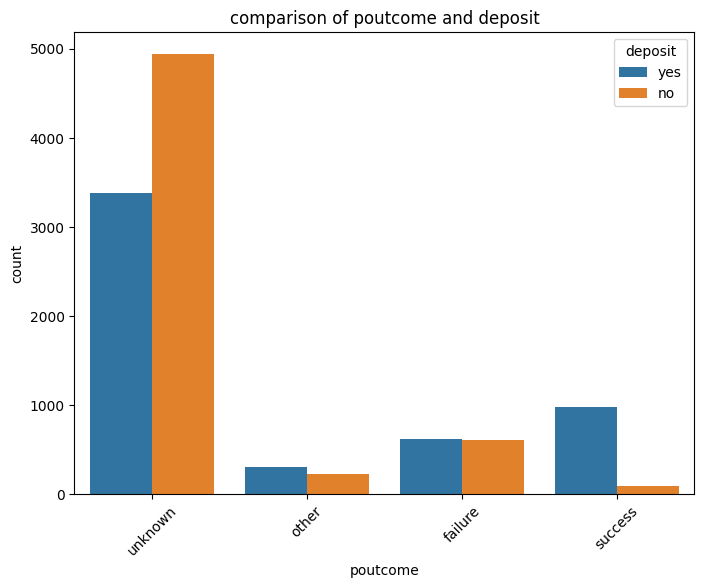

In [40]:
plt.figure(figsize=(8, 6))
sns.countplot(x='poutcome', hue='deposit', data=df)
plt.xticks(rotation=45)
plt.title('comparison of poutcome and deposit')
plt.show()

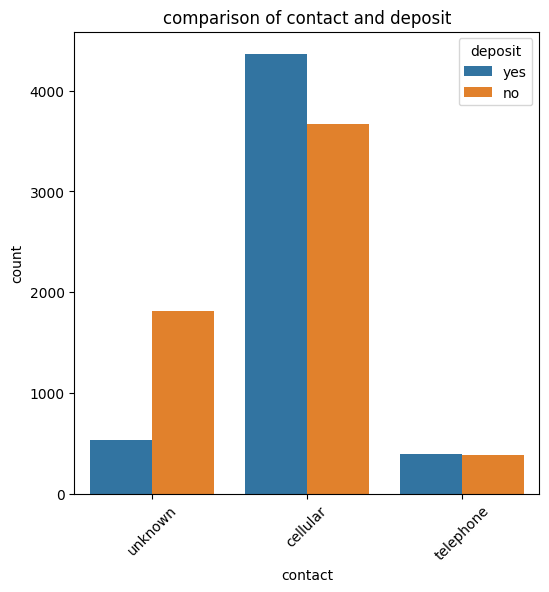

In [41]:
plt.figure(figsize=(6, 6))
sns.countplot(x='contact', hue='deposit', data=df)
plt.xticks(rotation=45)
plt.title('comparison of contact and deposit')
plt.show()

In [42]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [43]:
df


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [44]:
categorical_columns = ['job', 'marital','education','housing','loan','contact','month','poutcome','deposit']
le = preprocessing.LabelEncoder()
for col in categorical_columns:
    df1[col] = le.fit_transform(df1[col])

In [45]:
df1

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,deposit
0,59,0,1,1,2343,1,0,2,5,8,1042,1,0,3,1
1,56,0,1,1,45,0,0,2,5,8,1467,1,0,3,1
2,41,9,1,1,1270,1,0,2,5,8,1389,1,0,3,1
3,55,7,1,1,2476,1,0,2,5,8,579,1,0,3,1
4,54,0,1,2,184,0,0,2,5,8,673,2,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,1,1,0,0,20,0,257,1,0,3,0
11158,39,7,1,1,733,0,0,2,16,6,83,4,0,3,0
11159,32,9,2,1,29,0,0,0,19,1,156,2,0,3,0
11160,43,9,1,1,0,0,1,0,8,8,9,2,5,0,0


# correaltion

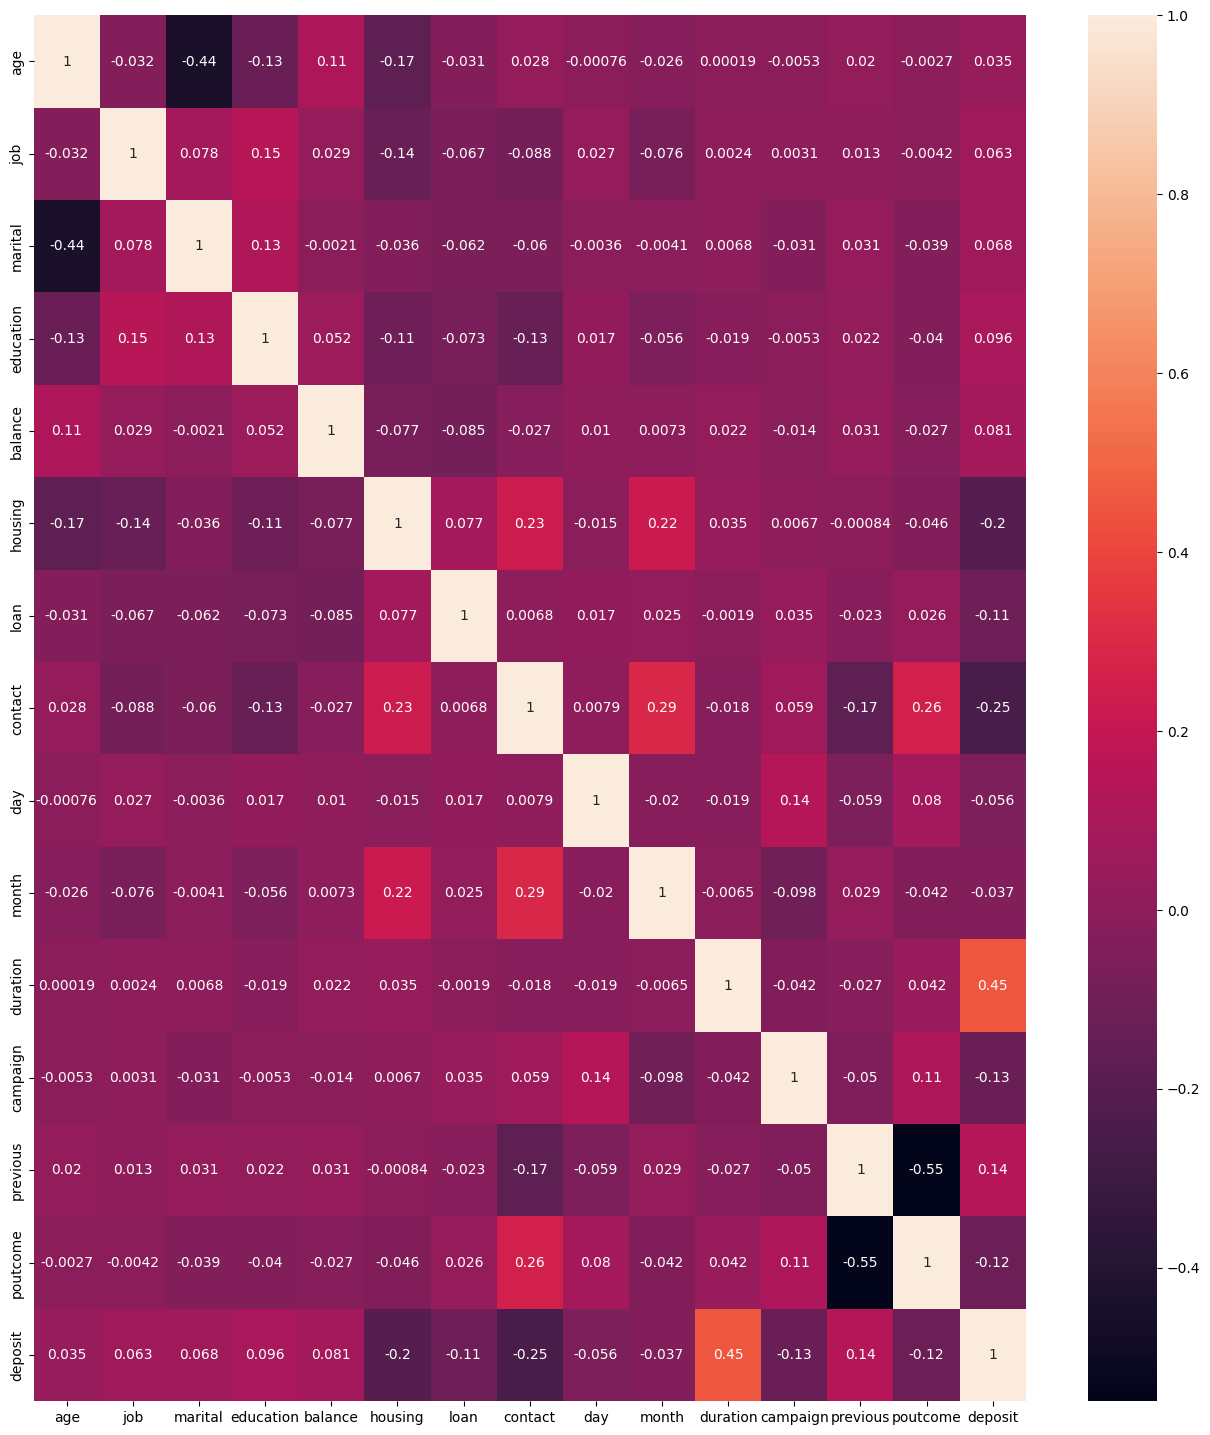

In [46]:
plt.figure(figsize=(16, 18))
sns.heatmap(df1.corr(), annot=True)
plt.show()

In [47]:
df1.describe()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,deposit
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,4.487905,1.199337,1.285164,1528.538524,0.473123,0.130801,0.489697,15.658036,5.445709,371.993818,2.508421,0.832557,2.477782,0.473840
std,11.913369,3.225132,0.625552,0.749478,3225.413326,0.499299,0.337198,0.818724,8.420740,3.191939,347.128386,2.722077,2.292007,1.002952,0.499338
min,18.000000,0.000000,0.000000,0.000000,-6847.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000
25%,32.000000,1.000000,1.000000,1.000000,122.000000,0.000000,0.000000,0.000000,8.000000,3.000000,138.000000,1.000000,0.000000,2.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,550.000000,0.000000,0.000000,0.000000,15.000000,6.000000,255.000000,2.000000,0.000000,3.000000,0.000000
75%,49.000000,7.000000,2.000000,2.000000,1708.000000,1.000000,0.000000,1.000000,22.000000,8.000000,496.000000,3.000000,1.000000,3.000000,1.000000
max,95.000000,11.000000,2.000000,3.000000,81204.000000,1.000000,1.000000,2.000000,31.000000,11.000000,3881.000000,63.000000,58.000000,3.000000,1.000000


In [48]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

# Model Building

In [49]:
#model building
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [50]:
x = df1.drop(['deposit'], axis=1)
y = df1['deposit']

In [51]:
scalar = MinMaxScaler()

In [107]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = 0.20, random_state = 0)

In [56]:
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(xtrain)
scaled_test = scaler.transform(xtest)

In [57]:
xtrain.shape

(8929, 14)

In [58]:
xtest.shape

(2233, 14)

# Random Forest

In [59]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state= 0)

In [60]:
rf_classifier.fit(xtrain, ytrain)

RandomForestClassifier(random_state=0)

In [61]:
y_pred = rf_classifier.predict(xtest)

In [62]:
accuracy = accuracy_score(ytest, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8374384236453202


In [63]:
#hyperparameter tuning

In [64]:
x1 = df1.drop(['deposit'], axis=1)
y1 = df1['deposit']

In [65]:
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(x1,y1,test_size = 0.20, random_state = 0)

In [66]:
rf_classifier1 = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)

In [67]:
cv_accuracy = cross_val_score(rf_classifier1, xtrain1, ytrain1, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_accuracy.mean()}")

Cross-Validation Accuracy: 0.8436536271843563


In [68]:
rf_classifier1.fit(xtrain1, ytrain1)

RandomForestClassifier(max_depth=10, random_state=0)

In [69]:
y_pred1 = rf_classifier1.predict(xtest1)

In [70]:
accuracy1 = accuracy_score(ytest1, y_pred1)
print(f"Test Set Accuracy: {accuracy1}")

Test Set Accuracy: 0.8356471115091805


In [72]:
#Randomized search cv

In [71]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [72]:
x2 = df1.drop(['deposit'],axis=1)
y2 = df1['deposit']

In [73]:
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(x2,y2,test_size = 0.20, random_state = 0)

In [74]:
clf = RandomForestClassifier()

In [75]:
param_dist = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [76]:
random_search = RandomizedSearchCV(
    clf,
    param_distributions=param_dist,
    n_iter=10,  # random combinations
    scoring='accuracy',
    cv=5  # no of cross-validation folds needed
)

In [77]:
random_search.fit(xtrain2, ytrain2)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 200]},
                   scoring='accuracy')

In [78]:
best_params = random_search.best_params_
best_model = random_search.best_estimator_

In [79]:
y_pred2 = best_model.predict(xtest2)

In [80]:
accuracy2 = accuracy_score(ytest2, y_pred2)

print(f"Best Parameters: {best_params}")
print(f"Test Accuracy: {accuracy2}")

Best Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 20}
Test Accuracy: 0.8392297357814599


# Naive Bayes

In [81]:
#naive bayes

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [83]:
x3 = df1.drop(['deposit'],axis=1)
y3 = df1['deposit']

In [84]:
xtrain3, xtest3, ytrain3, ytest3 = train_test_split(x3,y3,test_size = 0.20, random_state = 0)

In [85]:
clf_nb = GaussianNB()

In [86]:
clf_nb.fit(xtrain3, ytrain3)

GaussianNB()

In [87]:
y_pred3 = clf_nb.predict(xtest3)

In [88]:
accuracy3 = accuracy_score(ytest3, y_pred3)

print(f"Test Accuracy: {accuracy3}")

Test Accuracy: 0.7478728168383341


# GradientBoostingClassifier

In [89]:
from sklearn.ensemble import GradientBoostingClassifier

In [90]:
x4 = df1.drop(['deposit'],axis=1)
y4 = df1['deposit']

In [105]:
xtrain4, xtest4, ytrain4, ytest4 = train_test_split(x4,y4,test_size = 0.20, random_state = 0)

In [92]:
clf_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [93]:
clf_gb.fit(xtrain4, ytrain4)

GradientBoostingClassifier(random_state=42)

In [94]:
y_pred4 = clf_gb.predict(xtest4)

In [95]:
accuracy4 = accuracy_score(ytest4, y_pred4)
print(f"Test Accuracy: {accuracy4}")

Test Accuracy: 0.8360949395432155


# XGBClassifier

In [96]:
from xgboost import XGBClassifier

In [97]:
from sklearn.model_selection import cross_val_score
model_score =cross_val_score(estimator=RandomForestClassifier(),X=xtrain, y=ytrain, cv=5)
print(model_score)
print(model_score.mean())

[0.8493841  0.84098544 0.83762598 0.85890258 0.83361345]
0.8441023083365484


In [103]:
param_grid = {'XGBClassifier':{
        'model':XGBClassifier(objective='binary:logistic'),
        'param':{
            'learning_rate': [0.5, 0.1, 0.01, 0.001],
            'max_depth': [3, 5, 10, 20],
            'n_estimators': [10, 50, 100, 200]
        }
    }
}


In [109]:
model_xgb = XGBClassifier(objective='binary:logistic',learning_rate=0.1,max_depth=10,n_estimators=100)

In [110]:
model_xgb.fit(xtrain,ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [116]:
model_xgb.score(xtest,ytest)

0.8531124048365427

In [117]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest,model_xgb.predict(xtest))
cm

array([[1012,  193],
       [ 135,  893]], dtype=int64)

# LogisticRegression

In [336]:
from sklearn.linear_model import LogisticRegression

In [337]:
x5 = df1.drop(['deposit'],axis=1)
y5 = df1['deposit']

In [338]:
xtrain5, xtest5, ytrain5, ytest5 = train_test_split(x5,y5,test_size = 0.20, random_state = 42)

In [339]:
lr = LogisticRegression()

In [340]:
lr.fit(xtrain5,ytrain5)

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [341]:
pred = lr.predict(xtest5)

In [342]:
lr.score(xtrain5,ytrain5)

0.7631313696942547

In [343]:
lr.score(xtest5,ytest5)

0.7519032691446484

In [344]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [345]:
import statsmodels.api as sm

In [346]:
model_stats = sm.Logit(ytrain5,xtrain5).fit()

Optimization terminated successfully.
         Current function value: 0.474364
         Iterations 7


In [347]:
model_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                deposit   No. Observations:                 8929
Model:                          Logit   Df Residuals:                     8915
Method:                           MLE   Df Model:                           13
Date:                Thu, 12 Oct 2023   Pseudo R-squ.:                  0.3142
Time:                        09:40:11   Log-Likelihood:                -4235.6
converged:                       True   LL-Null:                       -6175.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0072      0.002     -4.008      0.000      -0.011      -0.004
job           -0.0030      0.008     -0.358      0.720      -0.020       0.013
marital       -0.0447      0.041     -1.078      0.281      -0.126       0.037
education      0.1421      0.036      3.998      0.000       0.072       0.212
balance     2.721e-05   8.72e-06      3.121      0.002    1.01e-05    4.43e-05
housing       -1.1245      0.057    -19.693      0.000      -1.236      -1.013
loan          -0.7895      0.086     -9.199      0.000      -0.958      -0.621
contact       -0.6802      0.041    -16.671      0.000      -0.760      -0.600
day           -0.0123      0.003     -3.939      0.000      -0.018      -0.006
month          0.0244      0.008      2.921      0.003       0.008       0.041
duration       0.0050      0.000     38.727      0.000       0.005       0.005
campaign      -0.1447      0.015     -9.944      0.000      -0.173      -0.116
previous       0.1020      0.015      6.705      0.000       0.072       0.132
poutcome      -0.1811      0.029     -6.155      0.000      -0.239      -0.123
==============================================================================
"""

In [348]:
df2 = df1.copy()
df2

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,deposit
0,59,0,1,1,2343,1,0,2,5,8,1042,1,0,3,1
1,56,0,1,1,45,0,0,2,5,8,1467,1,0,3,1
2,41,9,1,1,1270,1,0,2,5,8,1389,1,0,3,1
3,55,7,1,1,2476,1,0,2,5,8,579,1,0,3,1
4,54,0,1,2,184,0,0,2,5,8,673,2,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,1,1,0,0,20,0,257,1,0,3,0
11158,39,7,1,1,733,0,0,2,16,6,83,4,0,3,0
11159,32,9,2,1,29,0,0,0,19,1,156,2,0,3,0
11160,43,9,1,1,0,0,1,0,8,8,9,2,5,0,0


In [349]:
df2.drop(['job','marital'],axis=1)

,age,education,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,deposit
0,59,1,2343,1,0,2,5,8,1042,1,0,3,1
1,56,1,45,0,0,2,5,8,1467,1,0,3,1
2,41,1,1270,1,0,2,5,8,1389,1,0,3,1
3,55,1,2476,1,0,2,5,8,579,1,0,3,1
4,54,2,184,0,0,2,5,8,673,2,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,0,1,1,0,0,20,0,257,1,0,3,0
11158,39,1,733,0,0,2,16,6,83,4,0,3,0
11159,32,1,29,0,0,0,19,1,156,2,0,3,0
11160,43,1,0,0,1,0,8,8,9,2,5,0,0


In [350]:
x7 = df2.drop(['deposit'], axis=1)
y7 = df2['deposit']

In [351]:
xtrain7, xtest7, ytrain7, ytest7 = train_test_split(x7,y7,test_size = 0.20, random_state = 0)

In [352]:
lr_model = LogisticRegression()

In [353]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [354]:
lr.fit(xtrain7,ytrain7)

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [355]:
pred_lr = lr.predict(xtest7)

In [356]:
lr.score(xtrain7,ytrain7)

0.7603315040878038

In [357]:
lr.score(xtest7,ytest7)

0.7590685176892074

In [358]:
param_grid = {
    'penalty': ['l1', 'l2'],  
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  
    'solver': ['liblinear', 'saga','lbfgs','newton-cg'],  
    'max_iter': [100, 500, 1000]  
}

In [359]:
logreg = LogisticRegression()

In [360]:
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

In [361]:
grid_search.fit(xtrain7, ytrain7)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
180 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda\lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\anaconda\lib\site-packages\sklearn\lin

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 500, 1000], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga', 'lbfgs', 'newton-cg']},
             scoring='accuracy', verbose=1)

In [362]:
best_params = grid_search.best_params_

In [363]:
best_model = grid_search.best_estimator_

In [364]:
accuracy_logreg = best_model.score(xtest7, ytest7)

In [365]:
print("Best Hyperparameters:", best_params)
print("Test Accuracy:", accuracy_logreg)

Best Hyperparameters: {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Test Accuracy: 0.7819077474249888


# DecisionTree

In [320]:
from sklearn.tree import DecisionTreeClassifier

In [321]:
x6 = df1.drop(['deposit'],axis=1)
y6 = df1['deposit']

In [322]:
xtrain6, xtest6, ytrain6, ytest6 = train_test_split(x6,y6,test_size = 0.20, random_state = 42)

In [323]:
tree_classifier = DecisionTreeClassifier(random_state=42)

In [324]:
tree_classifier.fit(xtrain6, ytrain6)

DecisionTreeClassifier(random_state=42)

In [325]:
y_pred_dt = tree_classifier.predict(xtest6)

In [326]:
accuracy = accuracy_score(ytest6, y_pred_dt)
print(f"Accuracy: {accuracy}")

Accuracy: 0.768025078369906


In [327]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [328]:
grid_search = GridSearchCV(estimator=tree_classifier, param_grid=param_grid, scoring='accuracy', cv=5)

In [329]:
grid_search.fit(xtrain6, ytrain6)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [330]:
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [331]:
best_tree_classifier = DecisionTreeClassifier(**best_params, random_state=42)
best_tree_classifier.fit(xtrain6, ytrain6)


DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4,
                       min_samples_split=10, random_state=42)

In [332]:
y_pred_tree = best_tree_classifier.predict(xtest6)


In [334]:
accuracy_dt = accuracy_score(ytest6, y_pred_tree)
print(f"Accuracy: {accuracy_dt}")

Accuracy: 0.8029556650246306


In [158]:
from sklearn.feature_selection import mutual_info_classif

In [159]:
x8 = df1.drop(['deposit'],axis=1)
y8 = df1['deposit']

In [160]:
xtrain8, xtest8, ytrain8, ytest8 = train_test_split(x8,y8,test_size = 0.20, random_state = 42)

In [169]:
mutual_info = mutual_info_classif(xtrain8, ytrain8)
mutual_info

array([0.01691946, 0.0119146 , 0.00474219, 0.01721298, 0.00356745,
       0.01542605, 0.01557754, 0.03731712, 0.01166436, 0.0214761 ,
       0.11704884, 0.00861772, 0.00949986, 0.04841695])

In [170]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = xtrain8.columns
mutual_info.sort_values(ascending=False)

duration     0.117049
poutcome     0.048417
contact      0.037317
month        0.021476
education    0.017213
age          0.016919
loan         0.015578
housing      0.015426
job          0.011915
day          0.011664
previous     0.009500
campaign     0.008618
marital      0.004742
balance      0.003567
dtype: float64

<Axes: >

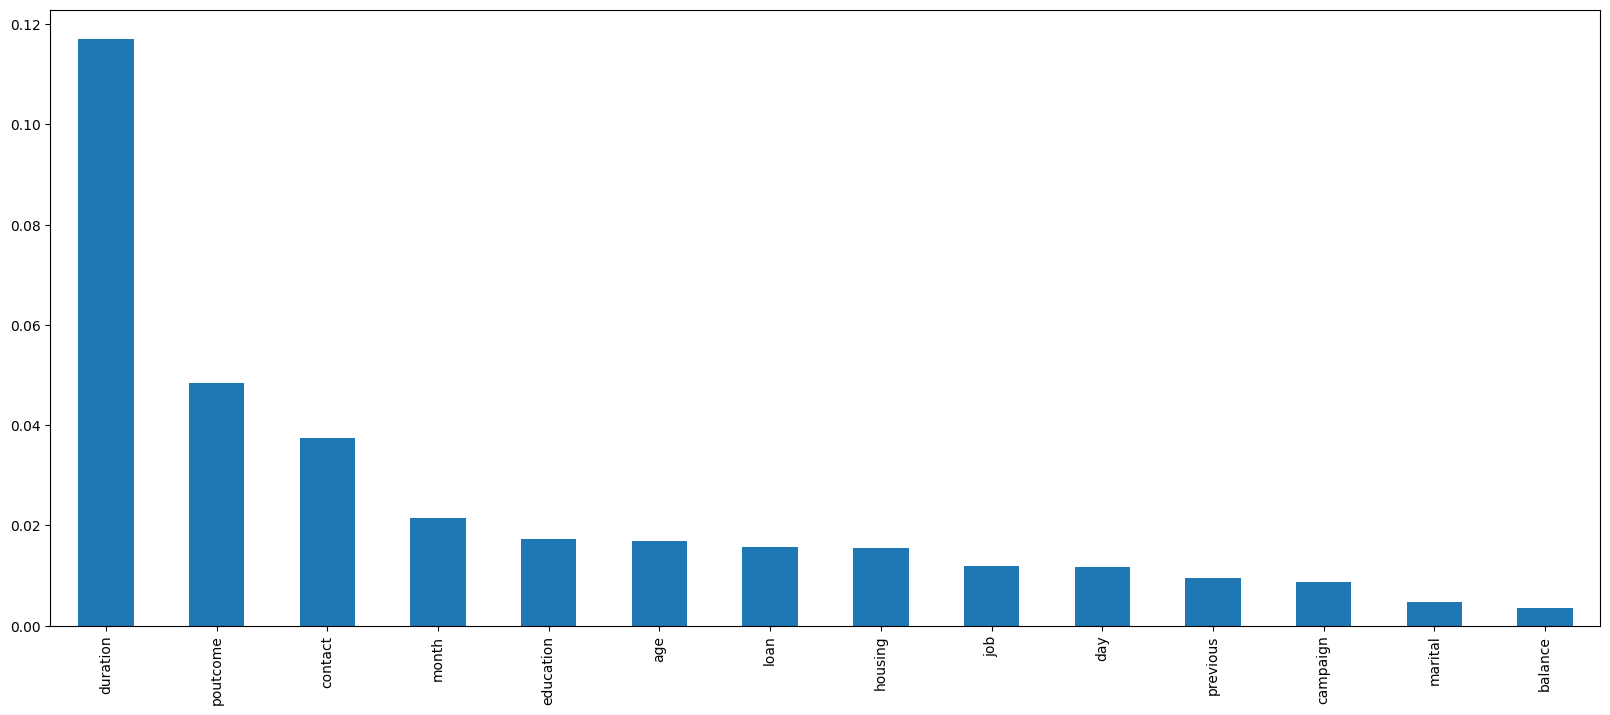

In [171]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [172]:
from sklearn.feature_selection import SelectKBest
sel_five_cols = SelectKBest(mutual_info_classif, k=5)
sel_five_cols.fit(xtrain8, ytrain8)
xtrain8.columns[sel_five_cols.get_support()]

Index(['age', 'contact', 'month', 'duration', 'poutcome'], dtype='object')

In [299]:
df3 = df1.copy()
df3

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,deposit
0,59,0,1,1,2343,1,0,2,5,8,1042,1,0,3,1
1,56,0,1,1,45,0,0,2,5,8,1467,1,0,3,1
2,41,9,1,1,1270,1,0,2,5,8,1389,1,0,3,1
3,55,7,1,1,2476,1,0,2,5,8,579,1,0,3,1
4,54,0,1,2,184,0,0,2,5,8,673,2,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,1,1,0,0,20,0,257,1,0,3,0
11158,39,7,1,1,733,0,0,2,16,6,83,4,0,3,0
11159,32,9,2,1,29,0,0,0,19,1,156,2,0,3,0
11160,43,9,1,1,0,0,1,0,8,8,9,2,5,0,0


In [300]:
df3.drop(['balance','marital','campaign'],axis=1)

,age,job,education,housing,loan,contact,day,month,duration,previous,poutcome,deposit
0,59,0,1,1,0,2,5,8,1042,0,3,1
1,56,0,1,0,0,2,5,8,1467,0,3,1
2,41,9,1,1,0,2,5,8,1389,0,3,1
3,55,7,1,1,0,2,5,8,579,0,3,1
4,54,0,2,0,0,2,5,8,673,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,0,1,0,0,20,0,257,0,3,0
11158,39,7,1,0,0,2,16,6,83,0,3,0
11159,32,9,1,0,0,0,19,1,156,0,3,0
11160,43,9,1,0,1,0,8,8,9,5,0,0


In [301]:
x9 = df3.drop(['deposit'],axis=1)
y9 = df3['deposit']

In [302]:
xtrain9, xtest9, ytrain9, ytest9 = train_test_split(x9,y9,test_size = 0.20, random_state = 42)

In [303]:
import xgboost as xgb

In [304]:
from sklearn.model_selection import cross_val_score
model_score =cross_val_score(estimator=RandomForestClassifier(),X=xtrain9, y=ytrain9, cv=5)
print(model_score)
print(model_score.mean())

[0.85442329 0.84546473 0.84378499 0.84882419 0.84761905]
0.848023249613395


In [305]:
model = xgb.XGBClassifier(objective='binary:logistic')

In [306]:
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200]
}

In [307]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=1)
grid_search.fit(xtrain9, ytrain9)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=1)

In [308]:
best_param = grid_search.best_params_
best_scor = grid_search.best_score_


In [309]:
print(f'Best Hyperparameters: {best_param}')
print(f'Best Accuracy Score: {best_scor}')

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}
Best Accuracy Score: 0.8563105673966359


In [310]:
best_model = grid_search.best_estimator_
y_pred9 = best_model.predict(xtest9)
test_accuracy9 = accuracy_score(ytest9, y_pred9)
print(f'Test Accuracy with Best Model: {test_accuracy9}')

Test Accuracy with Best Model: 0.8401253918495298


In [368]:
print(f"RandomForest Test Accuracy: {accuracy2}")
print(f"naive bayes Test Accuracy: {accuracy3}")
print(f"GradientBoosting Test Accuracy: {accuracy4}")
print(f"Xgboost : {model_xgb.score(xtest,ytest)}")
print("LogisticRegression Test Accuracy:", accuracy_logreg)
print(f"DesicionTree Accuracy: {accuracy_dt}")
print(f'Test Accuracy with Best Model: {test_accuracy9}')

RandomForest Test Accuracy: 0.8392297357814599
naive bayes Test Accuracy: 0.7478728168383341
GradientBoosting Test Accuracy: 0.8360949395432155
Xgboost : 0.8531124048365427
LogisticRegression Test Accuracy: 0.7819077474249888
DesicionTree Accuracy: 0.8029556650246306
Test Accuracy with Best Model: 0.8401253918495298


The best model The highest accuracy gives Xgboost has 85%